In [1]:
import numpy as np

from matplotlib import pyplot as plt

from scipy.integrate import quad
from scipy.stats import norm
from scipy.special import erf

## $f$-Divergences
First, we define the generic $f$-divergence
$$
    \mathsf{D}_f(P \,\Vert\, Q) = E_Q\biggl[ f\biggl(\frac{\mathrm{d} P}{\mathrm{d} Q}\biggr) \biggr].
    \label{eq:f-div}\tag{1}
$$
The following function evaluates an $f$-divergence numerically, which is useful for testing and verification.

In [17]:
def D_f(f, P, Q, x_min=-25, x_max=25):
    val, err = quad(lambda x: f(P.pdf(x) / Q.pdf(x)) * Q.pdf(x), x_min, x_max)
    return val

Next, we implement the three subadditive examples of $f$-divergences given in Section 5.1:

In [3]:
def f_KL(t):
    return -np.log(t)

def f_TV(t):
    return 0.5 * np.abs(t - 1)

def get_f_LL(a):
    def f_LL(t):
        return np.maximum(-np.log(t), a * (t - 1))
    return f_LL

## Gaussian Shift-in-Mean Case
As a preliminary result, we first derive expressions for $\mathsf{D}_\text{KL}$, $\mathsf{D}_\text{TV}$ and $\mathsf{D}_\text{LL}$ for the Gaussian shift-in-mean case, that is, $Q = \mathcal{N}(\mu_0, 1)$ and $P = \mathcal{N}(\mu_1, 1)$. In this case, the log-likelihood ratio is given by
$$
    \log \frac{\mathrm{d} P}{\mathrm{d} Q}(X) = -X (\mu_0 - \mu_1) + \frac{\mu_0^2 - \mu_1^2}{2}.
$$
It is not hard to show that
\begin{align}
    \mathcal{H}_0\colon \quad \log \frac{\mathrm{d} P}{\mathrm{d} Q}(X) &\stackrel{d}{=} 2\tau N - 2\tau^2 \label{llr-dist-P}\tag{2} \\
    \mathcal{H}_1\colon \quad \log \frac{\mathrm{d} P}{\mathrm{d} Q}(X) &\stackrel{d}{=} 2\tau N + 2\tau^2, \label{llr-dist-Q}\tag{3}
\end{align}
where $\stackrel{d}{=}$ denotes equality in distribution, $N \sim \mathcal{N}(0,1)$ is standard normally distributed, and we defined
$$
    \tau = \tau(\mu_0, \mu_1) = \frac{\lvert \mu_0 - \mu_1 \rvert}{2}.
    \label{tau}\tag{4}
$$
Note that ([2](#mjx-eqn-llr-dist-P)) and ([3](#mjx-eqn-llr-dist-Q)) imply
\begin{align}
    P\biggl[ \log \frac{\mathrm{d} P}{\mathrm{d} Q}(X) \leq 0 \biggr] &= \mathsf{P}\bigl[ N \leq -\tau \bigr] = \frac{1}{2}\left( 1 + \text{erf}\biggl( \frac{-\tau}{\sqrt{2}} \biggr) \right) \\
    Q\biggl[ \log \frac{\mathrm{d} P}{\mathrm{d} Q}(X) \leq 0 \biggr] &= \mathsf{P}\bigl[ N \leq \tau \bigr] = \frac{1}{2}\left( 1 + \text{erf}\biggl( \frac{\tau}{\sqrt{2}} \biggr) \right)
\end{align}

### KL Divergence
From ([3](#mjx-eqn-eq:llr-dist-Q)), it immediately follows that the reverse KL divergence for a Gaussian shift in mean is given by:
$$
    \mathsf{D}_\text{KL}(P \,\Vert\, Q) = E_Q\biggl[ -\log\biggl(\frac{\mathrm{d} P}{\mathrm{d} Q}(X)\biggr) \biggr]
    = 2 \tau^2.
$$
We can verify this result numerically:

In [4]:
# Define KL divergence for Gaussian shift in mean
def D_KL(mu0, mu1):
    tau = np.abs(mu0 - mu1) / 2
    return 2 * tau ** 2

In [5]:
mu = np.random.randn(2)
np.isclose(D_KL(mu[0], mu[1]), D_f(f_KL, norm(mu[0]), norm(mu[1])))

True

### TV Distance
For a Gaussian shift in mean, the TV distance calculates to
\begin{align}
    \mathsf{D}_\text{KL}(P \,\Vert\, Q) &= \frac{1}{2} \left( P\biggl[ \frac{\mathrm{d} P}{\mathrm{d} Q}(X) > 1 \biggr] - Q\biggl[ \frac{\mathrm{d} P}{\mathrm{d} Q}(X) > 1 \biggr] + Q\biggl[ \frac{\mathrm{d} P}{\mathrm{d} Q}(X) \leq 1 \biggr] - P\biggl[ \frac{\mathrm{d} P}{\mathrm{d} Q}(X) \leq 1 \biggr]\right) \\
    &= \frac{1}{2} \left( \mathsf{P}\bigl[ N > -\tau \bigr] - \mathsf{P}\bigl[ N > \tau \bigr] + \mathsf{P}\bigl[ N \leq \tau \bigr] - \mathsf{P}\bigl[ N \leq -\tau \bigr] \right) \\
    &= \mathsf{P}\bigl[ N \leq \tau \bigr] - \mathsf{P}\bigl[ N \leq -\tau \bigr] \\
    &= \frac{1}{2} \left( \text{erf}\biggl(\frac{\tau}{\sqrt{2}} \biggr) - \text{erf}\biggl(\frac{-\tau}{\sqrt{2}} \biggr) \right) \\
    &= \text{erf}\biggl(\frac{\tau}{\sqrt{2}} \biggr),
\end{align}
where the last equality follows from the fact that $\text{erf}(t) = -\text{erf}(-t)$. We can verify this result numerically:

In [6]:
# Define TV distance for Gaussian shift in mean
def D_TV(mu0, mu1):
    tau = np.abs(mu0 - mu1) / 2
    return erf(tau / np.sqrt(2))

In [7]:
mu = np.random.randn(2)
np.isclose(D_TV(mu[0], mu[1]), D_f(f_TV, norm(mu[0]), norm(mu[1])))

True

### LL Divergence
The LL divergence for a Gaussian shift in mean calculates to
\begin{align}
    \mathsf{D}_\text{LL}(P \,\Vert\, Q) &= a \left( P\biggl[\frac{\mathrm{d} P}{\mathrm{d} Q}(X) > 1 \biggr] - Q\biggl[ \frac{\mathrm{d} P}{\mathrm{d} Q}(X) > 1 \biggr] \right) + E_Q\biggl[1_{\{\frac{\mathrm{d} P}{\mathrm{d} Q} \leq 1\}} -\log \frac{\mathrm{d} P}{\mathrm{d} Q}(X) \biggr] \\
    &= a \left( \mathsf{P}\bigl[ N > -\tau \bigr] - \mathsf{P}\bigl[ N > \tau \bigr] \right) - E\bigl[1_{\{N \leq \tau\}} \bigl(2 \tau N + 2 \tau^2\bigr) \bigr] \\
    &= a \left( \mathsf{P}\bigl[ N > -\tau \bigr] - \mathsf{P}\bigl[ N > \tau \bigr] \right) - 2 \tau E\bigl[1_{\{N \leq \tau\}} N \bigr] - 2 \tau^2 \mathsf{P}\bigl[ N \leq \tau \bigr] \\
    & = \frac{a}{2} \left( \text{erf}\biggl(\frac{\tau}{\sqrt{2}} \biggr) - \text{erf}\biggl(\frac{-\tau}{\sqrt{2}} \biggr) \right) + \frac{2 \tau}{\sqrt{2 \pi}} \exp\biggl( -\frac{\tau^2}{2} \biggr) + \tau^2 \left( 1 + \text{erf}\biggl( \frac{\tau}{\sqrt{2}} \biggr) \right) \\
    & = a \; \text{erf}\biggl(\frac{\tau}{\sqrt{2}} \biggr) + \tau \sqrt{\frac{2}{\pi}} \exp\biggl( -\frac{\tau^2}{2} \biggr) + \tau^2 \left( 1 + \text{erf}\biggl( \frac{\tau}{\sqrt{2}} \biggr) \right)
\end{align}
Again, we can verify this result numerically:

In [8]:
def D_LL(mu0, mu1, a):
    tau = np.abs(mu0 - mu1) / 2
    return a * erf(tau / np.sqrt(2)) + tau * np.sqrt(2 / np.pi) * np.exp(-0.5 * tau ** 2) + tau ** 2 * (1 + erf(tau / np.sqrt(2)))

In [9]:
mu = np.random.randn(2)
a = 10 * np.random.rand()
np.isclose(D_LL(mu[0], mu[1], a), D_f(get_f_LL(a), norm(mu[0]), norm(mu[1])))

True

## AR(1) Process Example (Section 5.2.3)
In the example in Section 5.2.3, $X_n|\boldsymbol{X}_{n-1}$ is normally distributed under both hypotheses with means:
\begin{align}
    \mu_0 &= \theta_0 X_{n-1} \\
    \mu_1 &= \theta_1 X_{n-1}
\end{align}
Therefore, $\tau$ in ([3](#mjx-eqn-eq:tau)) becomes
$$
    \tau(\mu_0, \mu_1) = \frac{\lvert \theta_0 X_{n-1} - \theta_1 X_{n-1} \rvert}{2} = \frac{\lvert \theta_0 - \theta_1 \rvert}{2} \lvert X_{n-1} \rvert = \tau(\theta_0, \theta_1) \lvert X_{n-1} \rvert. \label{tau_theta} \tag{4}
$$
In what follows, it always holds that $\tau = \tau(\theta_0, \theta_1)$ and the arguments will often be omitted in the notation.  Under $\mathcal{H}_0$, the process $\boldsymbol{X}$ follows distribution $Q$ so that 
$$
    X_{n-1} \sim \mathcal{N}(0, \sigma_{n-1}^2), \quad \text{with} \quad 0 \leq \sigma_{n-1}^2 \leq \frac{1}{1 - \theta_0}.
$$
In order to average the divergences derived above over $X_{n-1}$, the following expected values are useful. Let $N \sim \mathcal{N}(0,\sigma^2)$. It then  holds that
\begin{align}
    E\biggl[ \text{erf}\biggl( \frac{\lvert N \rvert}{\sqrt{2}} \biggr) \biggr] &= \frac{2}{\pi} \arctan(\sigma) \label{exp_erf} \tag{5} \\
    E\biggl[ \lvert N \rvert^2 \text{erf}\biggl( \frac{\lvert N \rvert}{\sqrt{2}} \biggr) \biggr] &= \frac{2}{\pi} \sigma^2 \left( \frac{\sigma}{\sigma^2 + 1} +  \arctan(\sigma) \right) \label{exp_erf_2} \tag{6}\\
    E\biggl[ \lvert N \rvert \exp\biggl( -\frac{\lvert N \rvert^2}{2} \biggr) \biggr] &= \sqrt{\frac{2}{\pi}} \frac{\sigma}{\sigma^2 + 1}. \label{exp_exp} \tag{7}
\end{align}
The expressions on the right-hand side were obtained via WolframAlpha, but can also be looked up in integral tables. More precisely, ([5](#mjx-eqn-eq:exp_erf)) and ([6](#mjx-eqn-eq:exp_erf_2)) are special cases of the second and sixth integral in Section 4.3 of [2], and the expression on the right-hand side ([7](#mjx-eqn-eq:exp_exp)) can be obtained by writing the integral on the left-hand side as the mean of a half-normal distribution.

Next, the quantity $\mathrm{C}_f(\mathbb{P} \,\Vert\, \mathbb{Q})$ is derived for the KL divergence, TV distance and LL divergence.

### KL Divergence
For the KL divergence, the expected conditional divergence calculates to 
$$
    E_{\mathbb{Q}}\bigl[ \mathsf{D}_\text{KL}(P_n \,\Vert\, Q_n) \bigr] = 2 \tau^2 E_{\mathbb{Q}}\bigl[ \lvert X_{n-1} \rvert^2 \bigr] = 2 \tau^2 \sigma^2_{n-1}.
$$
Since under $\mathcal{H}_0$ the variance of $X_n$ is bounded by $\sigma^2_{n} \leq \frac{1}{1-\theta_0^2}$ for all $n \geq 1$, it follows that
$$
    \mathrm{C}_\text{KL}(\mathbb{P} \,\Vert\, \mathbb{Q}) = \sup_{n \geq 1}\; E_{\mathbb{Q}}\bigl[ \mathsf{D}_\text{KL}(P_n \,\Vert\, Q_n) \bigr] = 2 \frac{\tau^2}{1-\theta_0^2} = \frac{1}{2} \frac{\lvert \theta_0 - \theta_1 \rvert^2}{1 - \theta_0^2}= 2 \gamma^2
$$
where we defined
$$
    \gamma = \gamma(\theta_0, \theta_1) = \frac{\tau(\theta_0, \theta_1)}{\sqrt{1 - \theta_0}} = \frac{1}{2} \frac{\lvert \theta_0 - \theta_1 \rvert}{\sqrt{1 - \theta_0^2}}. \label{gamma} \tag{8}
$$
We can verfiy this result numerically.

In [10]:
def C_KL(theta0, theta1):
    gamma = np.abs(theta0 - theta1) / (2 * np.sqrt(1 - theta0 ** 2))
    return 2 * gamma ** 2

def C_KL_numeric(theta0, theta1, x_min=-25, x_max=25):
    X = norm(scale=1 / np.sqrt(1 - theta0 ** 2))
    C_KL, _ = quad(lambda x: D_KL(theta0 * x, theta1 * x) * X.pdf(x), x_min, x_max)
    return C_KL

theta = 2 * np.random.rand(2) - 1
np.isclose(C_KL(theta[0], theta[1]), C_KL_numeric(theta[0], theta[1]))

True

### TV Distance
From ([4](#mjx-eqn-eq:tau)) and ([5](#mjx-eqn-eq:exp_erf)), it follows that
$$
    E_{\mathbb{Q}}\bigl[ \mathsf{D}_\text{TV}(P_n \,\Vert\, Q_n) \bigr] = \frac{2}{\pi} \arctan\bigl( \tau \sigma_{n-1} \bigr)
$$
and
$$
    \mathrm{C}_\text{KL}(\mathbb{P} \,\Vert\, \mathbb{Q}) = \frac{2}{\pi} \arctan( \gamma ),
$$ 
with $\gamma$ defined in ([8](#mjx-eqn-eq:gamma)). We can verfiy this result numerically.

In [11]:
def C_TV(theta0, theta1):
    gamma = np.abs(theta0 - theta1) / (2 * np.sqrt(1 - theta0 ** 2))
    return (2 / np.pi) * np.arctan(gamma)

def C_TV_numeric(theta0, theta1, x_min=-25, x_max=25):
    X = norm(scale=1 / np.sqrt(1 - theta0 ** 2))
    C_TV, _ = quad(lambda x: D_TV(theta0 * x, theta1 * x) * X.pdf(x), x_min, x_max)
    return C_TV

theta = 2 * np.random.rand(2) - 1
np.isclose(C_TV(theta[0], theta[1]), C_TV_numeric(theta[0], theta[1]))

True

### LL Distance
From ([4](#mjx-eqn-eq:tau)), ([6](#mjx-eqn-eq:exp_erf_2)) and ([7](#mjx-eqn-eq:exp_exp)), it follows that
\begin{align}
    E_{\mathbb{Q}}\bigl[ \mathsf{D}_\text{LL}(P_n \,\Vert\, Q_n) \bigr] &= \frac{2}{\pi} a \; \arctan(\tau \sigma_{n-1}) + \frac{2}{\pi} \frac{\tau \sigma_{n-1}}{\tau^2 \sigma^2_{n-1} + 1} + \tau^2 \sigma^2_{n-1} + \frac{2}{\pi} \tau^2 \sigma^2_{n-1} \left( \frac{\tau \sigma_{n-1}}{\tau^2 \sigma^2_{n-1} + 1} + \arctan(\tau \sigma_{n-1}) \right) \\
    &= \frac{2}{\pi} \left( a \; \arctan(\tau \sigma_{n-1}) + \tau \sigma_{n-1} + \tau^2 \sigma^2_{n-1} \left( \frac{\pi}{2} + \arctan(\tau \sigma_{n-1}) \right) \right)
\end{align}
and, since the expression on the right-hand side is increasing in $\sigma_{n-1}$,
$$
    \mathrm{C}_\text{LL}(\mathbb{P} \,\Vert\, \mathbb{Q}) = \frac{2}{\pi} \left( a \; \arctan(\gamma) + \gamma + \gamma^2 \left( \frac{\pi}{2} + \arctan(\gamma) \right) \right)
$$ 
with $\gamma$ defined in ([8](#mjx-eqn-eq:gamma)). We can verfiy this result numerically.

In [12]:
def C_LL(theta0, theta1, a):
    gamma = np.abs(theta0 - theta1) / (2 * np.sqrt(1 - theta0 ** 2))
    return (2 / np.pi) * (a * np.arctan(gamma) + gamma + gamma ** 2 * ((np.pi / 2) + np.arctan(gamma)))

def C_LL_numeric(theta0, theta1, a, x_min=-25, x_max=25):
    X = norm(scale=1 / np.sqrt(1 - theta0 ** 2))
    C_LL, _ = quad(lambda x: D_LL(theta0 * x, theta1 * x, a) * X.pdf(x), x_min, x_max)
    return C_LL

theta = 2 * np.random.rand(2) - 1
a = 10 * np.random.rand()
np.isclose(C_LL(theta[0], theta[1], a), C_LL_numeric(theta[0], theta[1], a))

True

## Figure 2
We can now implement the corresponding bounds on the expected sample size of the underlying test and plot them against $\gamma$.

In [13]:
def B_KL(alpha, beta, gamma):
    D_num = (1 - alpha) * np.log((1 - alpha) / beta) + alpha * np.log(alpha / (1 - beta)) 
    D_den = 2 * gamma ** 2
    return D_num / D_den

def B_TV(alpha, beta, gamma):
    D_num = 1 - alpha - beta
    D_den = (2 / np.pi) * np.arctan(gamma)
    return D_num / D_den

def B_LL(alpha, beta, gamma, a):
    D_num = (1 - alpha) * np.log((1 - alpha) / beta) + a * (1 - alpha - beta)
    D_den = (2 / np.pi) * (gamma + gamma ** 2 * ((np.pi / 2) + np.arctan(gamma)) + a * np.arctan(gamma))
    return D_num / D_den

In [14]:
snr = np.linspace(-10, 10, 201) 
gamma = 10 ** (snr / 20)

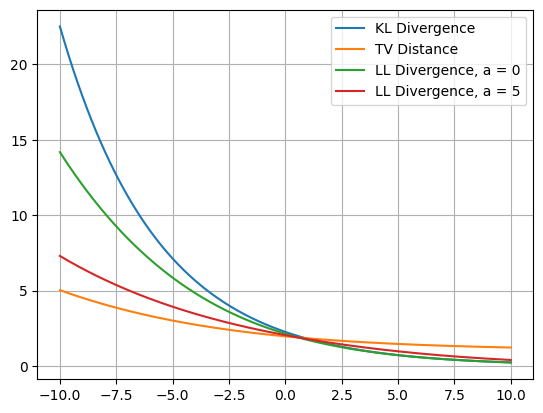

In [15]:
alpha = beta = 0.01
plt.plot(snr, B_KL(alpha, beta, gamma), label="KL Divergence")
plt.plot(snr, B_TV(alpha, beta, gamma), label="TV Distance")
plt.plot(snr, B_LL(alpha, beta, gamma, 0), label="LL Divergence, a = 0")
plt.plot(snr, B_LL(alpha, beta, gamma, 5), label="LL Divergence, a = 5")
plt.legend()
plt.grid()

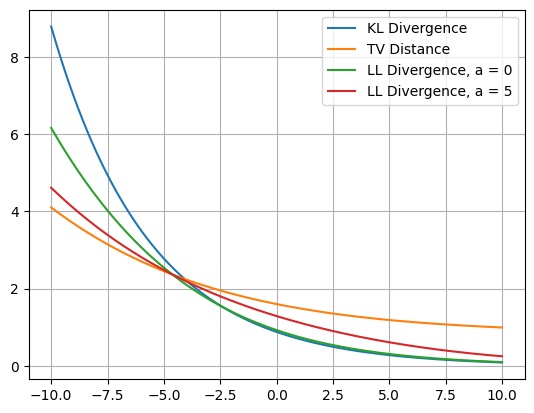

In [16]:
alpha = beta = 0.1
plt.plot(snr, B_KL(alpha, beta, gamma), label="KL Divergence")
plt.plot(snr, B_TV(alpha, beta, gamma), label="TV Distance")
plt.plot(snr, B_LL(alpha, beta, gamma, 0), label="LL Divergence, a = 0")
plt.plot(snr, B_LL(alpha, beta, gamma, 5), label="LL Divergence, a = 5")
plt.legend()
plt.grid()

## References
[1] <http://www.stat.yale.edu/~pollard/Courses/607.spring05/handouts/Totalvar.pdf>  
[2] <https://nvlpubs.nist.gov/nistpubs/jres/73b/jresv73bn1p1_a1b.pdf>